# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Đinh Nguyễn Gia Bảo
- MSSV: 22127027
- Lớp: 22CLC03

# Import

In [153]:
import pandas as pd
import numpy as np

# Import thêm dữ thư viện nếu cần
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression # Hồi quy tuyến tính
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Các hàm đánh giá mô hình
from sklearn.model_selection import cross_val_score, KFold # Tái chọn mô hình
from sklearn.preprocessing import StandardScaler 

# Đọc dữ liệu

In [154]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa 5 đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu huấn luyện)

X_test = test.iloc[:, :-1]      # Dataframe (chứa 5 đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần
features = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
target = 'Performance Index'

print(y_train)

0       69.0
1       84.0
2       82.0
3       38.0
4       68.0
        ... 
8995    13.0
8996    50.0
8997    53.0
8998    40.0
8999    42.0
Name: Performance Index, Length: 9000, dtype: float64


# Cài đặt hàm

In [155]:
# Cài đặt các hàm cần thiết ở đây
def plot_true_vs_predictions(y_true, y_pred):
    """
    Vẽ biểu đồ phân tán của giá trị thực tế và giá trị dự đoán.
    
    Parameters:
    y_true (array-like): Giá trị thực tế.
    y_pred (array-like): Giá trị dự đoán.
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.5)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('True Values vs Predictions')
    plt.show()

def plot_regression_line(y_true, y_pred):
    """
    Vẽ đường hồi quy giữa giá trị thực tế và giá trị dự đoán.
    
    Parameters:
    y_true (array-like): Giá trị thực tế.
    y_pred (array-like): Giá trị dự đoán.
    """
    plt.figure(figsize=(10, 6))
    sns.regplot(x=y_true, y=y_pred, scatter_kws={'s':30}, line_kws={'color':'red'})
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('Regression Line for True Values vs Predictions')
    plt.show()

def printMAE(y_true, y_pred):
    """
    Đánh giá mô hình bằng cách tính toán Mean Absolute Error (MAE).

    Parameters:
    y_true (array-like): Giá trị thực tế.
    y_pred (array-like): Giá trị dự đoán.

    Returns:
    None
    """
    mae = mean_absolute_error(y_true, y_pred)
    print(f"Mean Absolute Error: {mae:.3f}")

def create_regression_formula(intercept, coefficients, features):
    """
    Tạo công thức hồi quy từ hệ số chệch, các hệ số hồi quy và các đặc trưng.

    Parameters:
    intercept (float): Hệ số chệch của mô hình hồi quy.
    coefficients (array-like): Các hệ số hồi quy của các đặc trưng.
    features (list of str): Danh sách các đặc trưng.

    Returns:
    str: Công thức hồi quy.
    """
    intercept = round(intercept, 3)
    coefficients = np.round(coefficients, 3)
    
    formula = f"Student Performance = {intercept} "
    formula += " ".join([f"+ {coeff} * {feature}" for coeff, feature in zip(coefficients, features) if coeff != 0])
    
    return formula


*Chú thích: Cần có docstrings cho các hàm.*

# Yêu cầu 1: Phân tích khám phá dữ liệu (1 điểm)

   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               77                           0            5   
1              8               90                           1            4   
2              9               83                           1            6   
3              4               52                           0            9   
4              4               82                           1            8   

   Sample Question Papers Practiced  Performance Index  
0                                 2               69.0  
1                                 1               84.0  
2                                 3               82.0  
3                                 5               38.0  
4                                 6               68.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------         

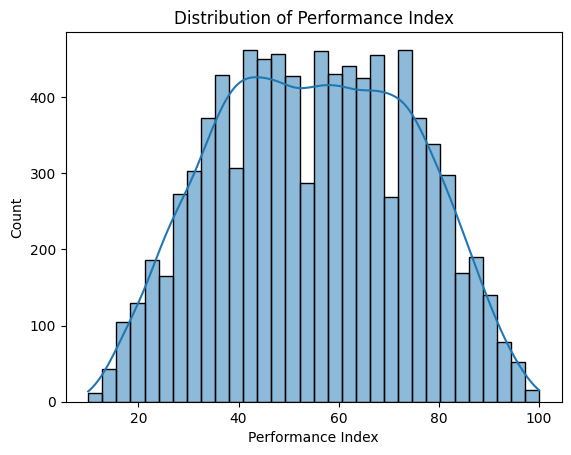

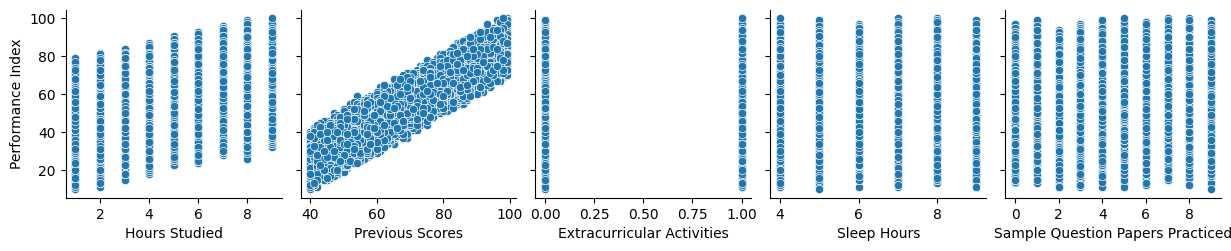

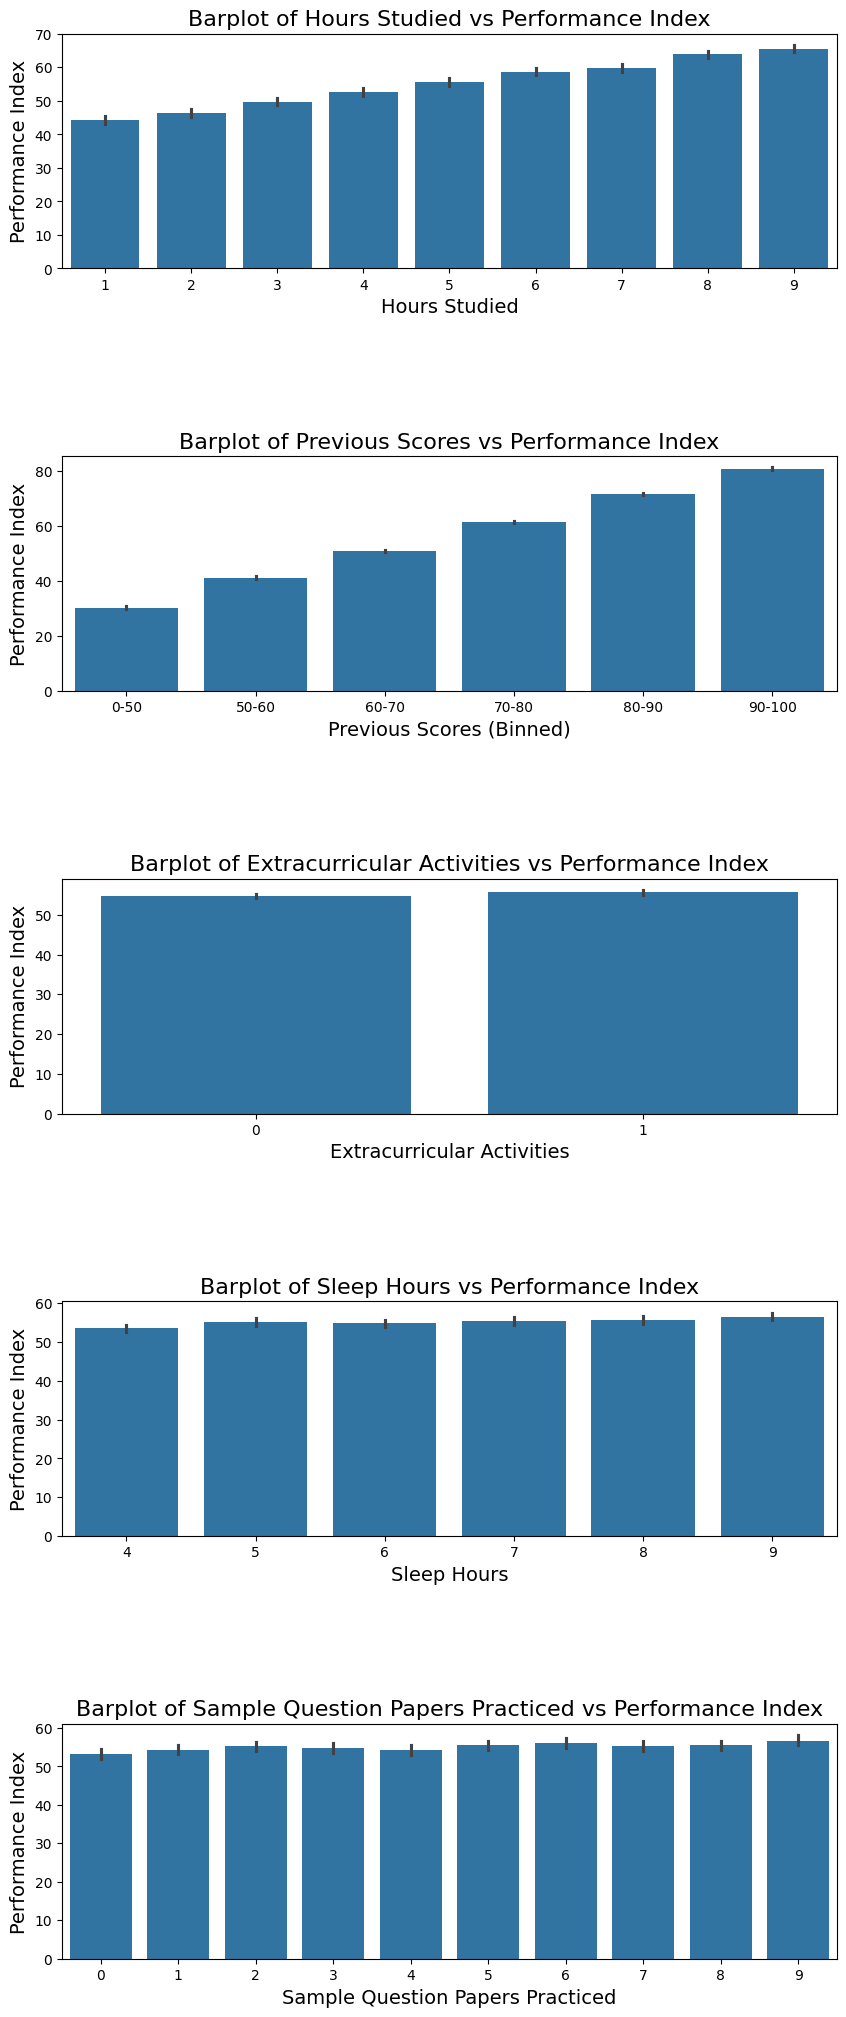

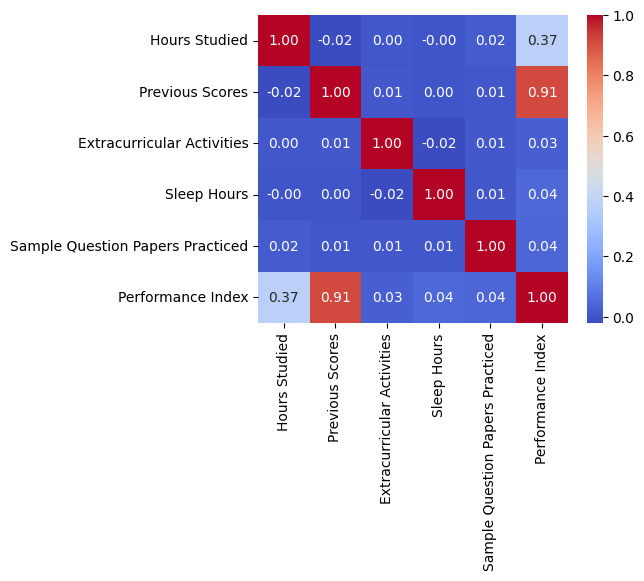

In [156]:
# Phân tích khám phá dữ liệu thông qua thống kê và các biểu đồ
# Chỉ được phân tích trên tập huấn luyện

# Đọc dữ liệu từ file CSV
train = pd.read_csv('train.csv')
# 1. Kiểm tra dữ liệu
print(train.head())        # Hiển thị những dòng đầu tiên của dữ liệu
print(train.info())        # Kiểm tra thông tin tổng quan về dữ liệu
print(train.describe())    # Thống kê mô tả

# 2. Kiểm tra giá trị thiếu
print(train.isnull().sum())  # Đếm số lượng giá trị thiếu trong mỗi cột

# 3. Phân tích mối quan hệ giữa các biến
# Ma trận tương quan
corr_matrix = train.corr()
print(corr_matrix)

# 4. Trực quan hóa dữ liệu

# Biểu đồ phân phối của Performance Index
sns.histplot(train['Performance Index'], kde=True)
plt.title('Distribution of Performance Index')
plt.show()

# Biểu đồ phân tán giữa các yếu tố và Performance Index
sns.pairplot(train, y_vars='Performance Index', 
             x_vars=['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced'], 
             kind='scatter')

plt.show()

# Biểu đồ cột
# Phân loại Previous Scores thành các nhóm (bins)
bins = [0, 50, 60, 70, 80, 90, 100]
labels = ['0-50', '50-60', '60-70', '70-80', '80-90', '90-100']
train['Previous Scores Binned'] = pd.cut(train['Previous Scores'], bins=bins, labels=labels)

# Tăng kích thước của figure để chứa các biểu đồ
plt.figure(figsize=(10, 25))

# Lặp qua từng feature và tạo biểu đồ cột
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i + 1)  # Chia subplot, mỗi hàng là một biểu đồ
    if feature == 'Previous Scores':  # Nếu feature là Previous Scores thì sử dụng phiên bản binned
        sns.barplot(x='Previous Scores Binned', y='Performance Index', data=train)
        plt.xlabel('Previous Scores (Binned)', fontsize=14)
    else:  # Các feature khác được vẽ bình thường
        sns.barplot(x=feature, y='Performance Index', data=train)
        plt.xlabel(feature, fontsize=14)
    
    plt.title(f'Barplot of {feature} vs Performance Index', fontsize=16)  # Tăng kích thước chữ tiêu đề
    plt.ylabel('Performance Index', fontsize=14)  # Tăng kích thước chữ trục y

# Điều chỉnh khoảng cách giữa các subplots để tăng không gian giữa các biểu đồ
plt.subplots_adjust(hspace=0.8)  # Tăng hspace để tạo thêm khoảng cách giữa các biểu đồ

plt.show()

# Vẽ heatmap để trực quan hóa ma trận tương quan
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


# Yêu cầu 2a: Xây dựng mô hình sử dụng toàn bộ 5 đặc trưng đề bài cung cấp (2 điểm) 

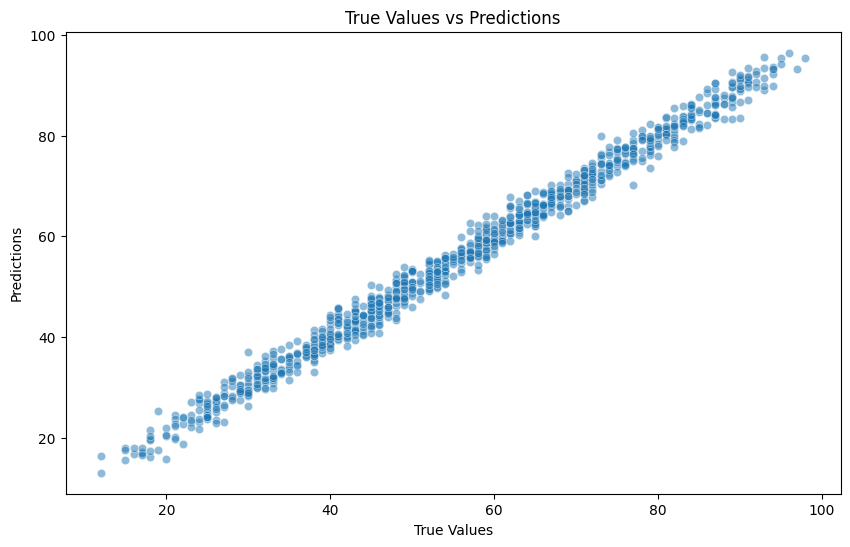

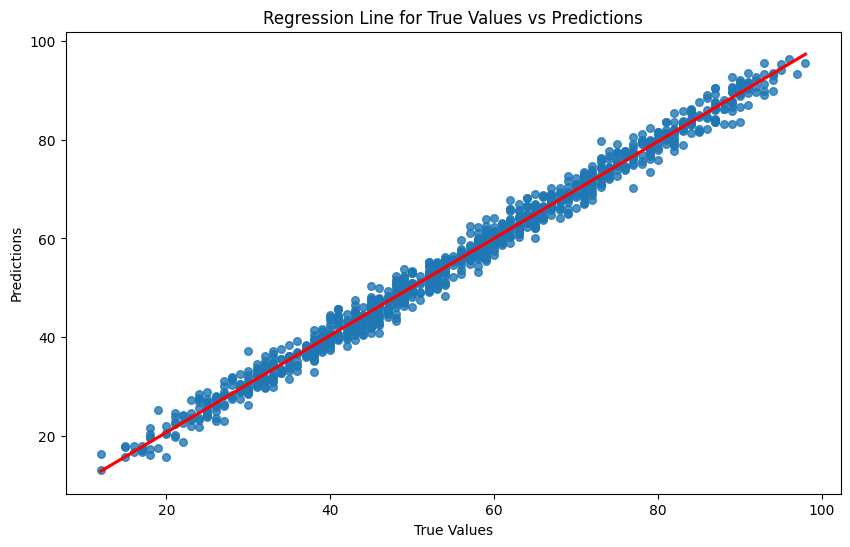

In [157]:
# Phần code cho yêu cầu 2a

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Vẽ biểu đồ phân tán của giá trị thực tế và giá trị dự đoán
plot_true_vs_predictions(y_test, y_pred)

# Vẽ đường hồi quy
plot_regression_line(y_test, y_pred)

In [158]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
# Đánh giá mô hình
printMAE(y_test, y_pred)

# In ra công thức hồi quy
formula = create_regression_formula(model.intercept_, model.coef_, features)
print(formula)

Mean Absolute Error: 1.596
Student Performance = -33.969 + 2.852 * Hours Studied + 1.018 * Previous Scores + 0.604 * Extracurricular Activities + 0.474 * Sleep Hours + 0.192 * Sample Question Papers Practiced


Công thức hồi quy, phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = ...$$

# Yêu cầu 2b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng, tìm mô hình cho kết quả tốt nhất (2 điểm)

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [159]:
# Phần code cho yêu cầu 2b
# Tìm ra đặc trưng tốt nhất (trong 5 đặc trưng)
# In ra các kết quả cross-validation như yêu cầu

# Tạo đối tượng k-fold cross validation với k = 5
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Khởi tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Lưu kết quả R^2 score của từng đặc trưng
results = {}

for feature in features:
    X = train[[feature]]  # Chọn một đặc trưng duy nhất
    y = train[target]     # Biến mục tiêu

    # Tính R^2 score sử dụng cross_val_score
    scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

    # Lưu lại kết quả trung bình
    results[feature] = np.mean(scores)

print()

#In ra đặc trưng tốt nhất
best_feature = max(results, key=results.get)
print(f"The best feature is: {best_feature} with a mean R^2 score of: {results[best_feature]}")

print()
print("R^2 scores for each feature:")
for feature in features:
    X = train[[feature]]
    y = train[target]

    #In ra kết quả R^2 score của từng fold
    scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    print(f"- {feature}, Fold R^2 Scores: {scores}, Mean R^2 Score: {np.mean(scores)}")




The best feature is: Previous Scores with a mean R^2 score of: 0.8365819535716327

R^2 scores for each feature:
- Hours Studied, Fold R^2 Scores: [0.11986998 0.15947627 0.12373949 0.13091999 0.14056384], Mean R^2 Score: 0.13491391477220951
- Previous Scores, Fold R^2 Scores: [0.83608216 0.8352534  0.83671487 0.83534227 0.83951707], Mean R^2 Score: 0.8365819535716327
- Extracurricular Activities, Fold R^2 Scores: [-0.00456081  0.00149733  0.00066903  0.00091722 -0.00274613], Mean R^2 Score: -0.0008446721254732114
- Sleep Hours, Fold R^2 Scores: [-0.00291756 -0.00398398  0.00299927  0.00195723  0.00306268], Mean R^2 Score: 0.00022352944552286313
- Sample Question Papers Practiced, Fold R^2 Scores: [-0.00636833  0.00092356  0.00202353  0.00030237  0.00300803], Mean R^2 Score: -2.217020897627986e-05


In [160]:
# Huấn luyện lại mô hình best_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
best_feature_model = LinearRegression()
best_feature_model.fit(train[[best_feature]], train[target])

# Dự đoán trên tập kiểm tra
y_pred = best_feature_model.predict(test[[best_feature]])

In [161]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_feature_model
# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

#In ra công thức hồi quy
formula = create_regression_formula(best_feature_model.intercept_, best_feature_model.coef_, [best_feature])
print(formula)

Mean Absolute Error: 6.544277293452501
Student Performance = -14.989 + 1.011 * Previous Scores


Công thức hồi quy (dựa trên mô hình đặc trưng tốt nhất), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = ...$$

# Yêu cầu 2c: Sinh viên tự xây dựng/thiết kế mô hình, tìm mô hình cho kết quả tốt nhất (2 điểm)

## Xây dựng/Thiết kế mô hình

In [162]:
# Trình bày toàn bộ code liên quan đến việc thiết kế mô hình

# Tạo đối tượng KFold với k = 5
kf = KFold(n_splits=5, shuffle=True, random_state=1)

#Mô hình 1: Hồi quy tuyến tính với hai đặc trưng "Hours Studied" và "Previous Scores"
X1 = train[['Hours Studied', 'Previous Scores']]
y = train['Performance Index']

model1 = LinearRegression()
scores1 = cross_val_score(model1, X1, y, cv=kf, scoring='r2')
print(f"Model 1 (Hours Studied + Previous Scores) Mean R^2 Score: {np.mean(scores1):.3f}")



# Chuẩn hóa đặc trưng
scaler = StandardScaler()
X2 = train[['Hours Studied', 'Previous Scores']]
X2_scaled = scaler.fit_transform(X2)

# Mô Hình 2: Hồi quy tuyến tính với các đặc trưng đã chuẩn hóa
model2 = LinearRegression()
scores2 = cross_val_score(model2, X2_scaled, y, cv=kf, scoring='r2')
print(f"Model 2 (Standardized Hours Studied + Previous Scores) Mean R^2 Score: {np.mean(scores2):.3f}")


# Tạo đặc trưng mới là tổng và bình phương của một đặc trưng
train['Hours Studied + Previous Scores'] = train['Hours Studied'] + train['Previous Scores']
train['Previous Scores^2'] = train['Previous Scores'] ** 2

X3 = train[['Hours Studied + Previous Scores', 'Previous Scores^2']]

# Mô Hình 3: Hồi quy tuyến tính với các đặc trưng biến đổi
model3 = LinearRegression()
scores3 = cross_val_score(model3, X3, y, cv=kf, scoring='r2')
print(f"Model 3 (Combined + Squared Previous Scores) Mean R^2 Score: {np.mean(scores3):.3f}")


Model 1 (Hours Studied + Previous Scores) Mean R^2 Score: 0.986
Model 2 (Standardized Hours Studied + Previous Scores) Mean R^2 Score: 0.986
Model 3 (Combined + Squared Previous Scores) Mean R^2 Score: 0.964


## Tìm mô hình cho kết quả tốt nhất

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

In [163]:
# Phần code cho yêu cầu 2c
# Tìm ra mô hình tốt nhất (trong m mô hình mà sinh viên tự thiết kế)
# In ra các kết quả cross-validation như yêu cầu

# Chọn mô hình tốt nhất
best_model_name = max(
    {
        'Model 1': np.mean(scores1),
        'Model 2': np.mean(scores2),
        'Model 3': np.mean(scores3)
    },
    key=lambda x: x[1]
)

print(f"The best model is: {best_model_name}")

The best model is: Model 1


In [164]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
if best_model_name == 'Model 1':
    X_best = train[['Hours Studied', 'Previous Scores']]
elif best_model_name == 'Model 2':
    X_best = scaler.fit_transform(train[['Hours Studied', 'Previous Scores']])
elif best_model_name == 'Model 3':
    X_best = train[['Hours Studied + Previous Scores', 'Previous Scores^2']]

best_model = LinearRegression()
best_model.fit(X_best, train['Performance Index'])


# Dự đoán trên tập kiểm tra
if best_model_name == 'Model 1':
    X_test = test[['Hours Studied', 'Previous Scores']]
elif best_model_name == 'Model 2':
    X_test = scaler.transform(test[['Hours Studied', 'Previous Scores']])
elif best_model_name == 'Model 3':
    test['Hours Studied + Previous Scores'] = test['Hours Studied'] + test['Previous Scores']
    test['Previous Scores^2'] = test['Previous Scores'] ** 2
    X_test = test[['Hours Studied + Previous Scores', 'Previous Scores^2']]

y_pred = best_model.predict(X_test)

In [165]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
# Đánh giá mô hình
printMAE(y_test, y_pred)

# In ra công thức hồi quy
if best_model_name == 'Model 1':
    formula = create_regression_formula(best_model.intercept_, best_model.coef_, ['Hours Studied', 'Previous Scores'])
elif best_model_name == 'Model 2':
    formula = create_regression_formula(best_model.intercept_, best_model.coef_, ['Hours Studied', 'Previous Scores'])
elif best_model_name == 'Model 3':
    formula = create_regression_formula(best_model.intercept_, best_model.coef_, ['Hours Studied + Previous Scores', 'Previous Scores^2'])

print(formula)

Mean Absolute Error: 1.839
Student Performance = -29.747 + 2.856 * Hours Studied + 1.018 * Previous Scores


Công thức hồi quy (dựa trên mô hình tốt nhất mà sinh viên tự xây dựng/thiết kế), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = ...$$